<a href="https://colab.research.google.com/github/Jake-Lockwood/Geostatistics/blob/main/PGE337_assignment8_F20_Interactive_Variogram_Calculation_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Interactive Variogram Calculation and Modeling Demonstration


### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


### The Interactive Workflow

Here's an interactive workflow for calculating directional experimental variograms in 2D. 

* setting the variogram calculation parameters for identifying spatial data pairs 

This approach is essential for quantifying spatial continuity with sparsely sampled, irregular spatial data.

I have more comprehensive workflows for variogram calculation:

* [Experimental Variogram Calculation in Python with GeostatsPy](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/GeostatsPy_variogram_calculation.ipynb)

* [Determination of Major and Minor Spatial Continuity Directions in Python with GeostatsPy](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/GeostatsPy_spatial_continuity_directions.ipynb)

#### Spatial Continuity 

**Spatial Continuity** is the correlation between values over distance.

* No spatial continuity – no correlation between values over distance, random values at each location in space regardless of separation distance.

* Homogenous phenomenon have perfect spatial continuity, since all values as the same (or very similar) they are correlated. 

We need a statistic to quantify spatial continuity! A convenient method is the Semivariogram.

#### The Semivariogram

Function of difference over distance.

* The expected (average) squared difference between values separated by a lag distance vector (distance and direction), $h$:

\begin{equation}
\gamma(\bf{h}) = \frac{1}{2 N(\bf{h})} \sum^{N(\bf{h})}_{\alpha=1} (z(\bf{u}_\alpha) - z(\bf{u}_\alpha + \bf{h}))^2  
\end{equation}

where $z(\bf{u}_\alpha)$ and $z(\bf{u}_\alpha + \bf{h})$ are the spatial sample values at tail and head locations of the lag vector respectively.

* Calculated over a suite of lag distances to obtain a continuous function.

* the $\frac{1}{2}$ term converts a variogram into a semivariogram, but in practice the term variogram is used instead of semivariogram.
* We prefer the semivariogram because it relates directly to the covariance function, $C_x(\bf{h})$ and univariate variance, $\sigma^2_x$:

\begin{equation}
C_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
\end{equation}

Note the correlogram is related to the covariance function as:

\begin{equation}
\rho_x(\bf{h}) = \frac{C_x(\bf{h})}{\sigma^2_x}
\end{equation}

The correlogram provides of function of the $\bf{h}-\bf{h}$ scatter plot correlation vs. lag offset $\bf{h}$.  

\begin{equation}
-1.0 \le \rho_x(\bf{h}) \le 1.0
\end{equation}

#### Variogram Observations

The following are common observations for variograms that should assist with their practical use.

##### Observation \#1 - As distance increases, variability increase (in general).

This is common since in general, over greater distance offsets, there is often more difference between the head and tail samples.

In some cases, such as with spatial cyclicity of the hole effect variogram model the variogram may have negative slope over somelag distance intervals

Negative slopes at lag distances greater than half the data extent are often caused by too few pairs for a reliable variogram calculation

##### Observation \#2 - Calculated with over all possible pairs separated by lag vector, $\bf{𝐡}$.

We scan through the entire data set, searching for all possible pair combinations with all other data.  We then calculate the variogram as one half the expectation of squared difference between all pairs.

More pairs results in a more reliable measure.

##### Observation \#3 - Need to plot the sill to know the degree of correlation.

**Sill** is the variance, $\sigma^2_x$

Given stationarity of the variance, $\sigma^2_x$, and variogram $\gamma(\bf{h})$:

we can define the covariance function:

\begin{equation}
C_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
\end{equation}

The covariance measure is a measure of similarity over distance (the mirror image of the variogram as shown by the equation above).

Given a standardized distribution $\sigma^2_x = 1.0$, the covariance, $C_x(\bf{h})$, is equal to the correlogram, $\rho_x(\bf{h})$: 

\begin{equation}
\rho_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
\end{equation}

##### Observation \#4 - The lag distance at which the variogram reaches the sill is know as the range.

At the range, knowing the data value at the tail location provides no information about a value at the head location of the lag distance vector.

##### Observation \#5 - The nugget effect, a discontinuity at the origin

Sometimes there is a discontinuity in the variogram at distances less than the minimum data spacing.  This is known as **nugget effect**.

The ratio of nugget / sill, is known as relative nugget effect (%). Modeled as a discontinuity with no correlation structure that at lags, $h \gt \epsilon$, an infinitesimal lag distance, and perfect correlation at $\bf{h} = 0$.
Caution when including nuggect effect in the variogram model as measurement error, mixing populations cause apparent nugget effect

This exercise demonstrates the semivariogram calculation with GeostatsPy. The steps include:

1. generate a 2D model with sequential Gaussian simulation
2. sample from the simulation
3. calculate and visualize experimental semivariograms

#### Variogram Calculation Parameters

The variogram calculation parameters include:

* **azimuth** is the azimuth of the lag vector

* **azimuth tolerance** is the maximum allowable departure from the azimuth (isotropic variograms are calculated with an azimuth tolerance of to 90.0)

* **unit lag distance** the size of the bins in lag distance, usually set to the minimum data spacing

* **lag distance tolerance** - the allowable tolerance in lage distance, commonly set to 50% of unit lag distanceonal smoothing

* **number of lags** - set based on the spatial extent of the dataset, we can typically calculate reliable variograms up to 1/2 the extent of the dataset

* **bandwidth** is the maximum offset allowable from the lag vector 


#### Variogram Modeling

Spatial continuity can be modeled with nested, positive definate variogram structures:

\begin{equation}
\Gamma_x(\bf{h}) = \sum_{i=1}^{nst} \gamma_i(\bf{h})
\end{equation}

where $\Gamma_x(\bf{h})$ is the nested variogram model resulting from the summation of $nst$ nested variograms  $\gamma_i(\bf{h})$.

The types of structure commonly applied include:

* spherical

* exponential

* gaussian

* nugget

Other less common models include:

* hole effect

* dampenned hole effect

* power law

these will not be covered here.

Each one of these variogram structures, $\gamma_i(\bf{h})$, is based on a geometric anisotropy model parameterized by the orientation and range in the major and minor directions.  In 2D this is simply an azimuth and ranges, $azi$, $a_{maj}$ and $a_{min}$. Note, the range in the minor direction (orthogonal to the major direction).

The geometric anisotropy model assumes that the range in all off-diagonal directions is based on an ellipse with the major and minor axes alligned with and set to the major and minor for the variogram.

\begin{equation}
\bf{h}_i = \sqrt{\left(\frac{r_{maj}}{a_{maj_i}}\right)^2 + \left(\frac{r_{maj}}{a_{maj_i}}\right)^2}  
\end{equation}

Therefore, if we know the major direction, range in major and minor directions, we may completely describe each nested componnent of the complete spatial continuity of the variable of interest, $i = 1,\dots,nst$.

Some comments on modeling nested variograms:

* we can capture nugget, short and long range continuity structures

* we rely on the geometric anisotropy model, so all structures must inform the same level of contribution (porportion of the sill) in all directions.

* the geometric anisotropy model is based on azimuth of the major direction of continuity, range in the major direction and range in the minor direction (orthogonal to the major direction).  The range is interpolated between the major and minor azimuths with a ellipse model

* we can vary the type of variogram, direction or azimuth of the major direction, and major and minor ranges by structure

In this workflow we will explore methods to:

1. detect directionality from a spatial dataset
2. calculate the directional variograms in the major and minor directions 
3. build a consistent 2D model fit to the major and minor directions

#### Objective 

In the PGE 383: Stochastic Subsurface Modeling class I want to provide hands-on experience with building subsurface modeling workflows. Python provides an excellent vehicle to accomplish this. I have coded a package called GeostatsPy with GSLIB: Geostatistical Library (Deutsch and Journel, 1998) functionality that provides basic building blocks for building subsurface modeling workflows. 

The objective is to remove the hurdles of subsurface modeling workflow construction by providing building blocks and sufficient examples. This is not a coding class per se, but we need the ability to 'script' workflows working with numerical methods.    

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data file to your working directory.  They are available here:

* Tabular data - sample_data.csv at https://git.io/fh4gm.

There are exampled below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

#### Load the required libraries

The following code loads the required libraries.

In [ ]:
import geostatspy.GSLIB as GSLIB                       # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats                 # GSLIB methods convert to Python    

We will also need some standard packages. These should have been installed with Anaconda 3.

In [ ]:
%matplotlib inline
import os                                               # to set current working directory 
import sys                                              # supress output to screen for interactive variogram modeling
import io
import numpy as np                                      # arrays and matrix math
import pandas as pd                                     # DataFrames
import matplotlib.pyplot as plt                         # plotting
from matplotlib.pyplot import cm                        # color maps
from ipywidgets import interactive                      # widgets and interactivity
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  


#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see above) GSLIB executables in this directory or a location identified in the environmental variable *Path*.

In [ ]:
os.chdir("c:/PGE383")                                   # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object. 

In [ ]:
df = pd.read_csv("spatial_nonlinear_MV_facies_v3.csv")           # read a .csv file in as a DataFrame
df.head()                                               # we could also use this command for a table preview 

,Unnamed: 0,X,Y,Por,Perm,AI,Facies
0,458,150,909,13.133413,485.231658,3848.226472,1
1,228,690,9,3.235632,138.238177,5673.521586,0
2,324,825,775,9.012557,317.338989,4370.886936,1
3,252,530,759,11.138872,414.252249,4003.754472,1
4,318,775,75,9.233079,350.924567,4134.272337,1


The features:

* **X** - x coordinate in meters
* **Y** - y coordinate in meters
* **Porosity** - rock porosity averaged over a specific rock unit from a vertical well
* **Perm** - rock permeability averaged (scaled up) over a specific rock unit from a vertical well 
* **AI** - acoustic impedance from a seismic cube assigned at a specific rock unit and at the location of a vertical well 
* **facies** - facies, 0 - shale, 1 - sandstone

Concerning facies:

We will work with all facies pooled together. I wanted to simplify this workflow and focus more on spatial continuity direction detection. Finally, by not using facies we do have more samples to support our statistical inference. Most often facies are essential in the subsurface model. Don't worry we will check if this is reasonable in a bit.   

You are welcome to repeat this workflow on a by-facies basis.  The following code could be used to build DataFrames ('df_sand' and 'df_shale') for each facies.

```p
df_sand = pd.DataFrame.copy(df[df['Facies'] == 1]).reset_index()  # copy only 'Facies' = sand records
df_shale = pd.DataFrame.copy(df[df['Facies'] == 0]).reset_index() # copy only 'Facies' = shale records
```

Let's look at summary statistics for all facies combined:

In [ ]:
df.describe().transpose()                               # summary table of sand only DataFrame statistics

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,270.0,227.829630,141.514802,0.000000,102.250000,220.500000,336.000000,499.000000
X,270.0,472.537037,288.917266,0.000000,225.000000,475.000000,745.000000,990.000000
Y,270.0,522.622222,277.643599,9.000000,309.000000,525.000000,769.000000,999.000000
Por,270.0,10.778590,3.665004,3.135247,7.909297,10.557808,13.119702,21.599413
Perm,270.0,406.286106,147.891654,138.238177,309.663433,408.150631,495.549617,798.263353
AI,270.0,4292.475630,433.786043,3630.239427,3981.691958,4192.107297,4491.224552,5701.203128
Facies,270.0,0.785185,0.411456,0.000000,1.000000,1.000000,1.000000,1.000000


#### Set the Model Parameters

See the the following model parameters:

* **xmin**, **xmax**, **ymin** and **ymax** - extents of the dataset for plotting
* **feature** and **feature_units** - feature of interest and associated units
* **vmin** and **vmax** - minimum and maximum of the feature of interest

In [ ]:
xmin = 0.0; xmax = 1000.0                                # spatial extents in x and y
ymin = 0.0; ymax = 1000.0
feature = 'Por'; feature_units = 'percentage'         # name and units of the feature of interest
vmin = 0.0; vmax = 25.0                                  # min and max of the feature of interest
cmap = plt.cm.inferno                                    # set the color map

Let's transform the feature to standard normal (mean = 0.0, standard deviation = 1.0, Gaussian shape). This is required for sequential Gaussian simulation (common target for our variogram models) and the Gaussian transform assists with outliers and provides more interpretable variograms. 

Let's look at the inputs for the GeostatsPy nscore program.  Note the output include an ndarray with the transformed values (in the same order as the input data in Dataframe 'df' and column 'vcol'), and the transformation table in original values and also in normal score values. 

In [ ]:
geostats.nscore                                         # see the input parameters required by the nscore function

<function geostatspy.geostats.nscore(df, vcol, wcol=None, ismooth=False, dfsmooth=None, smcol=0, smwcol=0)>

The following command will transform the Porosity and Permeabilty to standard normal. 

In [ ]:
#Transform to Gaussian by Facies
df['N' + feature], tvPor, tnsPor = geostats.nscore(df, feature) # nscore transform for all facies porosity 

Let's look at the updated DataFrame to make sure that we now have the normal score porosity and permeability.

In [ ]:
df.head()                                               # preview sand DataFrame with nscore transforms

,Unnamed: 0,X,Y,Por,Perm,AI,Facies,NPor
0,458,150,909,13.133413,485.231658,3848.226472,1,0.674490
1,228,690,9,3.235632,138.238177,5673.521586,0,-2.539185
2,324,825,775,9.012557,317.338989,4370.886936,1,-0.375340
3,252,530,759,11.138872,414.252249,4003.754472,1,0.097635
4,318,775,75,9.233079,350.924567,4134.272337,1,-0.306454


That looks good! One way to check is to see if the relative magnitudes of the normal score transformed values match the original values.  e.g. that the normal score transform of 0.10 porosity normal score is less than the normal score transform of 0.14 porsity.  Also, the normal score transform of values close to the mean value should be close to 0.0 

Let's also check the original and transformed sand and shale porosity distributions.

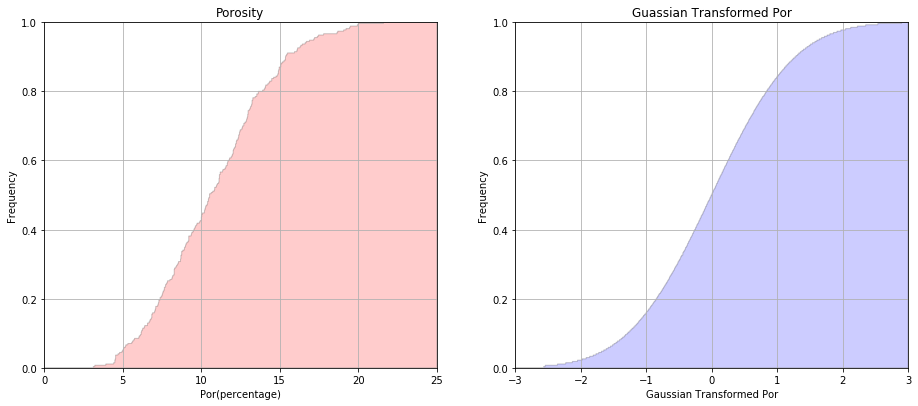

In [ ]:
plt.subplot(121)                                        # plot original sand and shale porosity histograms
plt.hist(df[feature], facecolor='red',bins=np.linspace(vmin,vmax,1000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black')
plt.xlim([vmin,vmax]); plt.ylim([0,1.0])
plt.xlabel(feature + '(' + feature_units + ')'); plt.ylabel('Frequency'); plt.title('Porosity')
plt.grid(True)

plt.subplot(122)  
plt.hist(df['N'+feature], facecolor='blue',bins=np.linspace(-3.0,3.0,1000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black')
plt.xlim([-3.0,3.0]); plt.ylim([0,1.0])
plt.xlabel('Gaussian Transformed ' + feature); plt.ylabel('Frequency'); plt.title('Guassian Transformed ' + feature)
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

We can see that the normal score transform has correctly transformed the feature to standard normal.

#### Inspection of Posted Data

Data visualization is very useful to detect patterns. Our brains are very good at pattern detection. I promote quantitative methods and recognize issues with cognitive bias, but it is important to recognize the value is expert intepretation based on data visualization.

* This data visualization will also be important to assist with parameter selection for the variogram calculation search template.

Let's plot the location maps of the original feature and the normal score transforms of the feature.

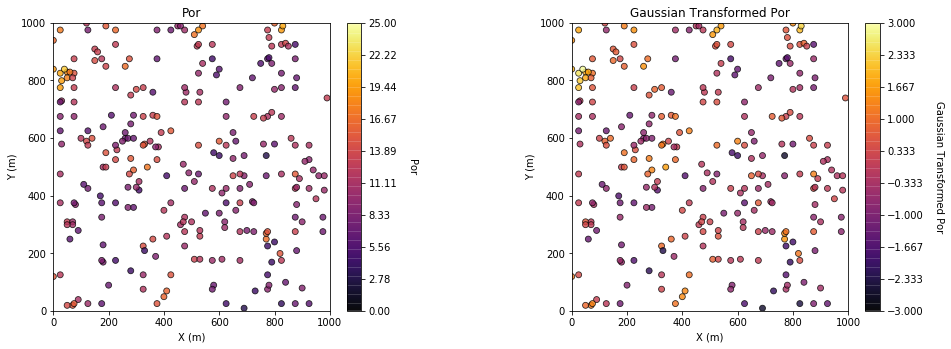

In [ ]:
plt.subplot(121)                                        # location map of normal score transform of porosity
GSLIB.locmap_st(df,'X','Y',feature,0,1000,0,1000,vmin,vmax,feature,'X (m)','Y (m)',feature,cmap)

plt.subplot(122)                                        # location map of normal score transform of porosity
GSLIB.locmap_st(df,'X','Y','N'+feature,0,1000,0,1000,-3,3,'Gaussian Transformed ' + feature,'X (m)','Y (m)','Gaussian Transformed ' + feature,cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.5, hspace=0.3)
plt.show()

#### Dashboard for Interactive Variogram Calculation and Modeling

Below we make a dashboard with the ipywidgets and matplotlib Python packages for calculating and modeling experimental variograms.

* allowing you to calculate and model the variogram of the normal score transformed variogram interactively while changing (and exploring) the search template parameters.

* first calculate the isotropic or directional variogram(s)

* then fit the same isotropic or directional variogram(s)

In [ ]:
# interactive calculation of the experimental variogram
l = widgets.Text(value='                              Variogram Calculation Interactive Demonstration, Michael Pyrcz, Associate Professor, The University of Texas at Austin',layout=Layout(width='950px', height='30px'))
lag = widgets.FloatSlider(min = 10, max = 500, value = 10, step = 10, description = 'lag',orientation='vertical',layout=Layout(width='90px', height='200px'))
lag.style.handle_color = 'gray'

lag_tol = widgets.FloatSlider(min = 5, max = 500, value = 5, step = 10, description = 'lag tolerance',orientation='vertical',layout=Layout(width='90px', height='200px'))
lag_tol.style.handle_color = 'gray'

nlag = widgets.IntSlider(min = 1, max = 100, value = 100, step = 1, description = 'number of lags',orientation='vertical',layout=Layout(width='90px', height='200px'))
nlag.style.handle_color = 'gray'

azi = widgets.FloatSlider(min = 0, max = 360, value = 0, step = 5, description = 'azimuth',orientation='vertical',layout=Layout(width='90px', height='200px'))
azi.style.handle_color = 'gray'

azi_tol = widgets.FloatSlider(min = 10, max = 90, value = 10, step = 5, description = 'azimuth tolerance',orientation='vertical',layout=Layout(width='120px', height='200px'))
azi_tol.style.handle_color = 'gray'

bandwidth = widgets.FloatSlider(min = 100, max = 2000, value = 2000, step = 100, description = 'bandwidth',orientation='vertical',layout=Layout(width='90px', height='200px'))
azi_tol.style.handle_color = 'gray'


ui1 = widgets.HBox([lag,lag_tol,nlag,azi,azi_tol,bandwidth],) # basic widget formatting    
ui = widgets.VBox([l,ui1],)

def f_make(lag,lag_tol,nlag,azi,azi_tol,bandwidth):     # function to take parameters, calculate variogram and plot
#    text_trap = io.StringIO()
#    sys.stdout = text_trap
    global lags,gammas,npps,lags2,gammas2,npps2
    tmin = -9999.9; tmax = 9999.9
    lags, gammas, npps = geostats.gamv(df,"X","Y","N"+feature,tmin,tmax,lag,lag_tol,nlag,azi,azi_tol,bandwidth,isill=1.0)
    lags2, gammas2, npps2 = geostats.gamv(df,"X","Y","N"+feature,tmin,tmax,lag,lag_tol,nlag,azi+90.0,azi_tol,bandwidth,isill=1.0)
    
    plt.subplot(111)                                    # plot experimental variogram
    plt.scatter(lags,gammas,color = 'black',s = npps*0.03,label = 'Major Azimuth ' +str(azi), alpha = 0.8)
    plt.scatter(lags2,gammas2,color = 'red',s = npps*0.03,label = 'Minor Azimuth ' +str(azi+90.0), alpha = 0.8)
    plt.plot([0,2000],[1.0,1.0],color = 'black')
    plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
    plt.ylabel(r'$\gamma \bf(h)$')
    if azi_tol < 90.0:
        plt.title('Directional NSCORE ' + feature + ' Variogram - Azi. ' + str(azi) + ', Azi. Tol.' + str(azi_tol))
    else: 
        plt.title('Omni Directional NSCORE ' + feature + ' Variogram ')
    plt.xlim([0,1000]); plt.ylim([0,1.8])
    plt.legend(loc="lower right")
    plt.grid(True)
    
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.0, wspace=0.3, hspace=0.3)
    plt.show()
    
    return
    
# connect the function to make the samples and plot to the widgets    
interactive_plot = widgets.interactive_output(f_make, {'lag':lag,'lag_tol':lag_tol,'nlag':nlag,'azi':azi,'azi_tol':azi_tol,'bandwidth':bandwidth})
interactive_plot.clear_output(wait = True)               # reduce flickering by delaying plot updating

### Interactive Variogram Calculation Demostration

* calculate omnidirectional and direction experimental variograms 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

### The Problem

Calculate interpretable experimental variograms for sparse, irregularly-space spatial data. Note, size of the experimental point is scaled by the number of pairs.

* **azimuth** is the azimuth of the lag vector

* **azimuth tolerance** is the maximum allowable departure from the azimuth

* **unit lag distance** the size of the bins in lag distance

* **lag distance tolerance** - the allowable tolerance in lage distance

* **number of lags** - number of lags in the experimental variogram

* **bandwidth** - maximum departure from the lag vector

In [ ]:
display(ui, interactive_plot)                           # display the interactive plot

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 432x288 with 1 Axes>', 'i…

In [ ]:
# interactive calculation of the sample set (control of source parametric distribution and number of samples)
l = widgets.Text(value='                              Variogram Modeling, Michael Pyrcz, Associate Professor, The University of Texas at Austin',layout=Layout(width='950px', height='30px'))
nug = widgets.FloatSlider(min = 0, max = 1.0, value = 0.0, step = 0.1, description = 'nug',orientation='vertical',layout=Layout(width='60px', height='200px'))
nug.style.handle_color = 'gray'
it1 = widgets.Dropdown(options=['Spherical', 'Exponential', 'Gaussian'],value='Spherical',
    description='Type1:',disabled=False,layout=Layout(width='200px', height='30px'))
c1 = widgets.FloatSlider(min=0.0, max = 1.0, value = 0.1, description = 'c1',orientation='vertical',layout=Layout(width='60px', height='200px'))
c1.style.handle_color = 'gray'
hmaj1 = widgets.FloatSlider(min=0.01, max = 10000.0, value = 0.01, step = 25.0, description = 'hmaj1',orientation='vertical',layout=Layout(width='60px', height='200px'))
hmaj1.style.handle_color = 'black'
hmin1 = widgets.FloatSlider(min = 0.01, max = 10000.0, value = 0.01, step = 25.0, description = 'hmin1',orientation='vertical',layout=Layout(width='60px', height='200px'))
hmin1.style.handle_color = 'red'

it2 = widgets.Dropdown(options=['Spherical', 'Exponential', 'Gaussian'],value='Spherical',
    description='Type2:',disabled=False,layout=Layout(width='200px', height='30px'))
c2 = widgets.FloatSlider(min=0.0, max = 1.0, value = 0.0, description = 'c2',orientation='vertical',layout=Layout(width='60px', height='200px'))
c2.style.handle_color = 'gray'
hmaj2 = widgets.FloatSlider(min=0.01, max = 10000.0, value = 0.01, step = 100.0, description = 'hmaj2',orientation='vertical',layout=Layout(width='60px', height='200px'))
hmaj2.style.handle_color = 'black'
hmin2 = widgets.FloatSlider(min = 0.01, max = 10000.0, value = 0.01, step = 100.0, description = 'hmin2',orientation='vertical',layout=Layout(width='60px', height='200px'))
hmin2.style.handle_color = 'red'

ui1 = widgets.HBox([nug,it1,c1,hmaj1,hmin1,it2,c2,hmaj2,hmin2],)                   # basic widget formatting   
#ui2 = widgets.HBox([it2,c2,hmaj2,hmin2],)                   # basic widget formatting   
ui = widgets.VBox([l,ui1],)

def convert_type(it):
    if it == 'Spherical': 
        return 1
    elif it == 'Exponential':
        return 2
    else: 
        return 3

def f_make(nug,it1,c1, hmaj1, hmin1, it2, c2, hmaj2, hmin2):                       # function to take parameters, make sample and plot
    text_trap = io.StringIO()
    sys.stdout = text_trap
    
    it1 = convert_type(it1); it2 = convert_type(it2)
    if c2 > 0.0:
        nst = 2
    else:
        nst = 1
    
    vario = GSLIB.make_variogram(nug,nst,it1,c1,0.0,hmaj1,hmin1,it2,c2,0.0,hmaj2,hmin2) # make model object
    nlag = 100; xlag = 10;                                     
    index_maj,h_maj,gam_maj,cov_maj,ro_maj = geostats.vmodel(nlag,xlag,0.0,vario)   # project the model in the major azimuth                                                  # project the model in the 135 azimuth
    index_min,h_min,gam_min,cov_min,ro_min = geostats.vmodel(nlag,xlag,90.0,vario)   

    plt.subplot(111)                                    # plot experimental variogram
    plt.scatter(lags,gammas,color = 'black',s = npps*0.03,label = 'Major Azimuth ' +str(azi.value), alpha = 0.8)
    plt.plot(h_maj,gam_maj,color = 'black')
    plt.scatter(lags2,gammas2,color = 'red',s = npps*0.03,label = 'Minor Azimuth ' +str(azi.value+90.0), alpha = 0.8)
    plt.plot(h_min,gam_min,color = 'red')
    plt.plot([0,2000],[1.0,1.0],color = 'black')
    plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
    plt.ylabel(r'$\gamma \bf(h)$')
    if azi_tol.value < 90.0:
        plt.title('Directional NSCORE ' + feature + ' Variogram - Azi. ' + str(azi.value) + ', Azi. Tol.' + str(azi_tol.value))
    else: 
        plt.title('Omni Directional NSCORE ' + feature + ' Variogram ')
    plt.xlim([0,1000]); plt.ylim([0,1.8])
    plt.legend(loc="lower right")
    plt.grid(True)
    
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.5, wspace=0.3, hspace=0.3)
    plt.show()
    
# connect the function to make the samples and plot to the widgets    
interactive_plot = widgets.interactive_output(f_make, {'nug':nug, 'it1':it1,'c1':c1, 'hmaj1':hmaj1, 'hmin1':hmin1, 'it2':it2, 'c2':c2, 'hmaj2':hmaj2, 'hmin2':hmin2})
interactive_plot.clear_output(wait = True)               # reduce flickering by delaying plot updating

### Interactive Nested Variogram Modeling Demostration

* select the nested structures and their types, contributions and major and minor ranges 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

### The Problem

Fit a positive definite variogram model based on the addition of multiple structures each describing spatial components of the feature variance 

* **nug**: nugget effect

* **c1 / c2**: contributions of the sill

* **hmaj1 / hmaj2**: range in the major direction

* **hmin1 / hmin2**: range in the minor direction

In [ ]:
display(ui, interactive_plot)                           # display the interactive plot

Output(outputs=({'output_type': 'stream', 'text': 'C:\\Users\\17137\\anaconda3\\lib\\site-packages\\geostatspy…

#### Comments

This was a basic demonstration / exercise of variogram calculation and modeling for spatial continuity analysis. Much more could be done, I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)  
  